In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

from time import sleep
import re

In [2]:
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\alsoj\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache


In [259]:
url = 'https://www.balaan.co.kr'

In [260]:
browser.get(url)

In [261]:
get_ceo_name(browser.page_source)

'대표 최형록'

In [256]:
browser.page_source[browser.page_source.rfind('대표'):browser.page_source.rfind('대표')+50]

''

'<html dir="ltr" lang="ko"><head>\n  <meta charset="utf-8">\n  <meta name="color-scheme" content="light dark">\n  <meta name="theme-color" content="#fff">\n  <meta name="viewport" content="initial-scale=1, minimum-scale=1, width=device-width">\n  <meta http-equiv="Content-Security-Policy" content="require-trusted-types-for \'script\'; trusted-types;">\n  <title>개인정보 보호 오류</title>\n  <style>/* Copyright 2017 The Chromium Authors. All rights reserved.\n * Use of this source code is governed by a BSD-style license that can be\n * found in the LICENSE file. */\n\na {\n  color: var(--link-color);\n}\n\nbody {\n  --background-color: #fff;\n  --error-code-color: var(--google-gray-700);\n  --google-blue-100: rgb(210, 227, 252);\n  --google-blue-300: rgb(138, 180, 248);\n  --google-blue-600: rgb(26, 115, 232);\n  --google-blue-700: rgb(25, 103, 210);\n  --google-gray-100: rgb(241, 243, 244);\n  --google-gray-300: rgb(218, 220, 224);\n  --google-gray-500: rgb(154, 160, 166);\n  --google-gray-50:
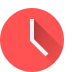
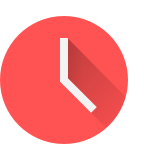
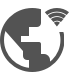
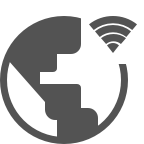
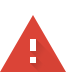
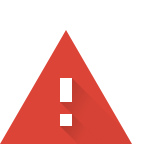
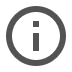
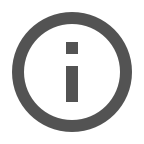
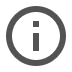
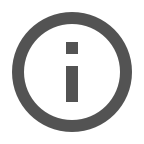
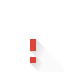
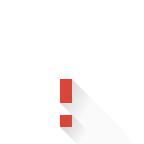
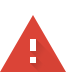
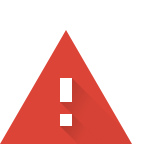
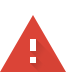
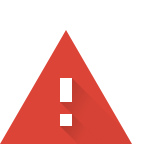

In [257]:
browser.page_source

## 광고 검색해서 쇼핑몰 url 추출(1 page)

In [5]:
# 해당 페이지 내에 존재하는 쇼핑몰 리스트 추출
def get_mall_list(browser):
    
    # 썸네일 이미지가 있는 건들만 List로 추출(썸네일 없는 건은 광고)
    mall_thumb_list = browser.find_elements(by=By.CLASS_NAME, value='ad_thumb')
    
    mall_url_list = []
    for mall_thumb in mall_thumb_list:
        mall_url_list.append(mall_thumb.find_element(by=By.TAG_NAME, value='a').get_attribute('href'))
    
    return mall_url_list

In [6]:
# 해당 페이지 내에 존재하는 쇼핑몰 이동
def go_mall_in_page(browser):
    
    # 썸네일 이미지가 있는 건들만 List로 추출(썸네일 없는 건은 광고)
    mall_thumb_list = browser.find_elements(by=By.CLASS_NAME, value='ad_thumb')

    for mall_thumb in mall_thumb_list:
        mall_thumb.click()
        sleep(3)
        get_mall_info(browser)

In [29]:
browser.switch_to.window(window_name=browser.window_handles[0])
go_mall_in_page(browser)

스마트스토어 업체 PASS :  https://smartstore.naver.com/3_9seconds/products/4659492800?n_media=122875&n_query=%EB%82%A8%EC%9E%90%EC%87%BC%ED%95%91%EB%AA%B0&n_rank=26&n_ad_group=grp-a001-01-000000019475007&n_ad=nad-a001-01-000000125042401&n_keyword_id=nkw-a001-01-000003443107922&n_keyword=%EB%82%A8%EC%9E%90%EC%87%BC%ED%95%91%EB%AA%B0&n_campaign_type=1&n_ad_group_type=1&NaPm=ct%3Dl5u7i7n4%7Cci%3D0Aa0002Ywbvw23ltr1jI%7Ctr%3Dsa%7Chk%3D0e7de9833464c7228a8b7a4d74e2080f99a2ea6c
카페24 호스팅 업체 PASS :  https://www.h-in-c.com/?n_media=122875&n_query=%EB%82%A8%EC%9E%90%EC%87%BC%ED%95%91%EB%AA%B0&n_rank=27&n_ad_group=grp-a001-01-000000010608345&n_ad=nad-a001-01-000000124962606&n_keyword_id=nkw-a001-01-000001946905896&n_keyword=%EB%82%A8%EC%9E%90%EC%87%BC%ED%95%91%EB%AA%B0&n_campaign_type=1&n_ad_group_type=1&NaPm=ct%3Dl5u7ibi0%7Cci%3D0AO00033wbvwKLPZ2fmu%7Ctr%3Dsa%7Chk%3D1c0b4ee185955ebb8e238577295ff3a7692d7ffc
카페24 호스팅 업체 PASS :  https://cozymode.co.kr/
카페24 호스팅 업체 PASS :  https://hotcodeshop.com/product/list

In [6]:
mall_list = get_mall_list(browser)
mall_list = list(set(mall_list))
mall_list

['https://adcr.naver.com/adcr?x=pXaaSmxfVdRo1AOMv8BHwP///w==kHWYkrXaquBAuHfT6ZBKodV1P3FUmrcYFf2h61g0ZXIjh18+eCZV/6XkFNQj51FbvBR11wYI1+ZcVS7lj6MynQxcQJOIeA4NT+tF8nn5z+o6XUVYS6DfwGOKWR6S8WbSKJYwXNvxZ7zgAxQnfv5PYxmhlr9b1V355CCWJGUCkKArj4X2RE+qFqwJ4hyHDN9pu4CTd4fz88b0ffeJ2J4cdGD6bz/YV8yeMqiWFZe5NswmYmZm7/nB0Cjx/hnRrCmo5vISKUvniO60jr8rkjhyzKMKP+YJhzLN/r7EArnQaz6TCp4JRG0v+kPqGeLGFJsP/9sOJlZZ68f57H1TFIguP1AtRyThpZmTVQEI0EFxHrJLknfw7uhfZd8JfFuQ3oiJRniy1/pkger0YCgser/pJ14Iw+90jBlSuoJ1MSZxqVcng0qoLpDqnt48pIhIIkg704WjI8NtxRu0T0TQBTAZs+rQfxfiWoiK7LhnIqUtTl1c9MouXnmey+tcAJTeN8hp4by/WlWcXcy1GRs2Bd/XBDPAcEo4DUlYe9FZO9dMUfcSbbJOgeEdwrNgb1gRRpUAmWxvFEyOnrCdRarxbVB+rgPM/vZ4RzoShPNc5/TzuXH4kL1YGZdC8HfVN4uj1mxvRclw5e6hyobnVAoyhmsSyTLFMOXDdJnlRiCMC9TnEcUppKP+pdaubqIWdJUKgtxbQNsMAuGh9CFpF5ULXd6LBTtgGGhNioteSPuEtx1vbgK32Jfoaq60AhafE8dWzo/aPIrE7zH+Phil1P/bsYn6AEiAx2ji0ydSPYBH9H5QqBFjf5DXrHktoKKzjfU2IpiIYLDHtzGtADVnse2Qq4c7BUD8fhxZ8qO/pX3CWRYY9sxTlN12K/hUiXMA58DdmVywL',
 'https://adcr.naver.com/adcr?x=T0Uu+KGg

## 페이지 이동

In [28]:
browser.switch_to.window(window_name=browser.window_handles[0])
go_to_next(browser)

페이지 이동


'move'

In [27]:
# 다음 페이지로 이동
def go_to_next(browser):
    next_button = browser.find_elements(by=By.CLASS_NAME, value='next')
    if next_button : 
        next_button[0].click()
        print("페이지 이동")
        return "move"
    else :
        print("마지막 페이지입니다")
        return "end"

In [8]:
progress = 'start'
while(progress != 'end'):
    progress = go_to_next(browser)

페이지 이동
페이지 이동
페이지 이동
페이지 이동
페이지 이동
페이지 이동
페이지 이동
마지막 페이지입니다


## 상세 페이지 크롤링
- 쇼핑몰 명 : title
- 쇼핑몰 URL : url
- 대표 명 키워드 : 대표, CEO, C.E.O, OWNER
- 전화번호 : 전화, CALL, TEL
- 이메일 : 메일, mail

In [29]:
# selenium tab이동
last_tab = browser.window_handles[-1]
browser.switch_to.window(window_name=last_tab)

In [49]:
get_mall_info(browser)

카페24 호스팅 업체 PASS :  https://ad.search.naver.com/search.naver?where=ad&sm=svc_nrs&query=%EB%82%A8%EC%9E%90%EC%87%BC%ED%95%91%EB%AA%B0&referenceId=&pagingIndex=4


InvalidSessionIdException: Message: invalid session id
Stacktrace:
Backtrace:
	Ordinal0 [0x009B6463+2188387]
	Ordinal0 [0x0094E461+1762401]
	Ordinal0 [0x00863C40+801856]
	Ordinal0 [0x008868BD+944317]
	Ordinal0 [0x00887AD6+948950]
	GetHandleVerifier [0x00C571F2+2712546]
	GetHandleVerifier [0x00C4886D+2652765]
	GetHandleVerifier [0x00A4002A+520730]
	GetHandleVerifier [0x00A3EE06+516086]
	Ordinal0 [0x0095468B+1787531]
	Ordinal0 [0x00958E88+1805960]
	Ordinal0 [0x00958F75+1806197]
	Ordinal0 [0x00961DF1+1842673]
	BaseThreadInitThunk [0x7706FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77A67A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77A67A6E+238]


In [254]:
def get_ceo_name(source):
    source = source.upper()
    source = source.replace('대표이미지','')
    source = source.replace('대표번호','')
    source = source.replace('대표 이미지','')
    source = source.replace('대표 번호','')
    source = source.replace('OWNERID','')
    source = source.replace('&NBSP;','')
    source = source.replace('<STRONG>','')
    source = source.replace('</STRONG>','')

#     source = re.compile('(<([^>]+)>)').sub('', source)
    
    ceo = ''
    
    if len(source[source.rfind('대표자'):source.rfind('대표자')+20]) > 0:
        ceo = source[source.rfind('대표자'):source.rfind('대표자')+20]
    elif len(source[source.rfind('대표이사'):source.rfind('대표이사')+20]) > 0 :
        ceo = source[source.rfind('대표이사'):source.rfind('대표이사')+20]        
    elif len(source[source.rfind('CEO'):source.rfind('CEO')+20]) > 0 :
        ceo = source[source.rfind('CEO'):source.rfind('CEO')+20]
    elif len(source[source.rfind('C.E.O'):source.rfind('C.E.O')+20]) > 0 :
        ceo = source[source.rfind('C.E.O'):source.rfind('C.E.O')+20]
    elif len(source[source.rfind('OWNER'):source.rfind('OWNER')+20]) > 0 :
        ceo = source[source.rfind('OWNER'):source.rfind('OWNER')+20]    
    elif len(source[source.rfind('대표'):source.rfind('대표')+20]) > 0:
        ceo = source[source.rfind('대표'):source.rfind('대표')+20]    
    
    ceo = re.compile('(<([^>]+)>)').sub('',ceo)
    ceo = re.compile('(<([^>]+))').sub('',ceo)
    
    ceo = ceo.replace(',',' ')
    ceo = re.compile('[^ ㄱ-ㅣ가-힣+|A-Z+|a-z+]').sub('',ceo)
#     ceo = re.compile('\|.+').sub('',ceo)
#     ceo = re.compile('\ㅣ.+').sub('',ceo)
    
    
    rtn_ceo = ''
    for text in ceo.split(' '):
        if len(text.strip()) > 0:
            rtn_ceo += text + ' '
    
    return rtn_ceo.strip()

In [52]:
def get_email(source):
    email = ''
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', source)
    
    if len(emails) > 0:
        email = emails[-1].lower()

    return email.strip()

In [81]:
def get_tel(source):
    tel= ''
    tels = re.findall(r'(?<!-|\d)\d{2,4}-\d{3,4}-\d{4}(?!-|\d)', source)
    print(tels)
    if len(tels) > 0:
        tel = tels[-1]
    else :
        tels = re.findall(r'(?<!-|\d)\d{4}-\d{4}(?!-|\d)', source)
        print(tels)
        if len(tels) > 0:
            tel = tels[-1]

    return tel.strip()

In [49]:
browser.switch_to.window(window_name=browser.window_handles[-1])
source = browser.page_source

In [50]:
get_ceo_name(source)

' 강일훈   '

In [35]:
get_tel(browser.page_source)

['010-7504-6424']


'010-7504-6424'

In [45]:
source[source.upper().find('CEO'):source.upper().find('CEO')+20]

'Ceo</span><span>김현준<'

In [13]:
def get_mall_info(browser):
    browser.switch_to.window(window_name=browser.window_handles[-1])
    
    source = browser.page_source
    cur_url = browser.current_url
    
    if '카페24' in source or 'cafe24' in source:
        print('카페24 호스팅 업체 PASS : ', cur_url)
        print("===================================================================")
    elif 'smartstore' in cur_url :
        print('스마트스토어 업체 PASS : ', cur_url)
        print("===================================================================")
    elif '메이크샵' in cur_url :
        print('메이크샵 호스팅 업체 PASS : ', cur_url)
        print("===================================================================")        
    else :
        title = browser.title
        site_url = cur_url.split('/')[2]
        
        # 대표 추출
        ceo = get_ceo_name(source)
        
        # 이메일 추출
        email = get_email(source)

        # 전화번호 추출
        tel = get_tel(source)

        print("사이트 명 : ", title)
        print("사이트 url : ", site_url)
        print("대표 : ", ceo)
        print("이메일 주소 : ", email)
        print("전화번호 : ", tel)
        print("===================================================================")

    browser.close()
    browser.switch_to.window(window_name=browser.window_handles[0])

In [135]:
ceo = browser.page_source[browser.page_source.find('대표'):browser.page_source.find('대표')+20]
if not ceo:
    ceo = browser.page_source[browser.page_source.find('CEO'):browser.page_source.find('CEO')+20]
# ceo = re.compile('[^ ㄱ-ㅣ가-힣+]').sub('',ceo)
ceo

'CEO:KIM HYUNG JOO \n<'

In [16]:
if '카페24' in browser.page_source or 'cafe24'  in browser.page_source:
    print('카페24 호스팅 업체 PASS')
else :
    footer = browser.find_element(by=By.TAG_NAME, value='footer') 

False

In [29]:
ceo = browser.page_source[browser.page_source.find('대표'):browser.page_source.find('대표')+10]
tel = browser.page_source[browser.page_source.find('전화'):browser.page_source.find('전화')+10]

In [30]:
ceo = re.compile('[^ ㄱ-ㅣ가-힣+]').sub('',ceo)
tel = re.compile('[^ ㄱ-ㅣ가-힣+]').sub('',ceo)

'대표. 이종훈</s'

In [32]:
re.compile('[^ ㄱ-ㅣ가-힣+]').sub('',ceo)

'대표 이종훈'

In [65]:
len(mall_list)

163

In [101]:
text = '<span> 대표 : shinmincheol.</spa'

In [102]:
get_ceo_name(text)

'SHINMINCHEOL'

In [78]:
ceo.strip()

'강한샘이근우'

In [ ]:
(?<!-)\d{2,4}-\d{3,4}-\d{4}(?!-)(?!\d)